In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import sys
ROOT = "../../"
sys.path.append(ROOT) # Add root directory to path

from src.utils.PSFDataset import PSFDataset
from src.utils.ClassifierModel import ClassifierModel

In [2]:
trainset = PSFDataset.load(ROOT + 'src/data/datasets/single_fov_standard_psf/single_dye/coverslip/AF647_CF660c_training_unnormalized.pt')
testset = PSFDataset.load(ROOT + 'src/data/datasets/single_fov_standard_psf/single_dye/coverslip/AF647_CF660c_testing_unnormalized.pt')

In [3]:
print(len(trainset), len(testset))

55488 2669


In [4]:
# training data
N_training_examples = 10000
N_validation_examples = 2000
random_seed = 1 # random seed for reproducibility
np.random.seed(random_seed)
all_train_indices = np.random.choice(np.arange(len(trainset)),
                               size=N_training_examples+N_validation_examples)
training_indices = all_train_indices[:N_training_examples]
validation_indices = all_train_indices[N_training_examples:]

In [5]:
# configuration parameters, you can play around with these
pooling = 'max' # 'max' or 'mean'

if pooling == 'max':
    pool_fcn = nn.AdaptiveMaxPool2d((1, 1))
else:
    pool_fcn = nn.AdaptiveAvgPool2d((1, 1))

# your model will have length(channel_widths)-1 layers
channel_widths = [1, 64, 128] # must start with a 1 and be at least length--2
linear_sizes = [128]
kernel = 3
model = ClassifierModel(channel_widths, linear_sizes, kernel, pool_fcn)

In [6]:
config = {'lr': 1e-4,
          'n_epochs': 20,
          'batch_size': 128}
verbose = True # print metrics during training, False for no printing
model.train_model(trainset, training_indices, validation_indices, config)

Epoch 1/20: (Train) Loss = 1.3573e+01, Acc = 0.5978, (Val) Loss = 8.0961e-01, Acc = 0.5685
Epoch 2/20: (Train) Loss = 5.5955e-01, Acc = 0.7240, (Val) Loss = 5.5085e-01, Acc = 0.7250
Epoch 3/20: (Train) Loss = 5.3964e-01, Acc = 0.7333, (Val) Loss = 8.6541e-01, Acc = 0.5415
Epoch 4/20: (Train) Loss = 5.2504e-01, Acc = 0.7463, (Val) Loss = 5.2554e-01, Acc = 0.7495
Epoch 5/20: (Train) Loss = 5.0261e-01, Acc = 0.7683, (Val) Loss = 6.0257e-01, Acc = 0.7090
Epoch 6/20: (Train) Loss = 5.0241e-01, Acc = 0.7590, (Val) Loss = 5.2079e-01, Acc = 0.7635
Epoch 7/20: (Train) Loss = 4.9968e-01, Acc = 0.7628, (Val) Loss = 5.5743e-01, Acc = 0.6950
Epoch 8/20: (Train) Loss = 4.9609e-01, Acc = 0.7645, (Val) Loss = 5.7662e-01, Acc = 0.7645
Epoch 9/20: (Train) Loss = 4.9145e-01, Acc = 0.7693, (Val) Loss = 4.9956e-01, Acc = 0.7730
Epoch 10/20: (Train) Loss = 4.8717e-01, Acc = 0.7723, (Val) Loss = 5.3440e-01, Acc = 0.7455
Epoch 11/20: (Train) Loss = 4.7973e-01, Acc = 0.7727, (Val) Loss = 5.1474e-01, Acc = 0.77

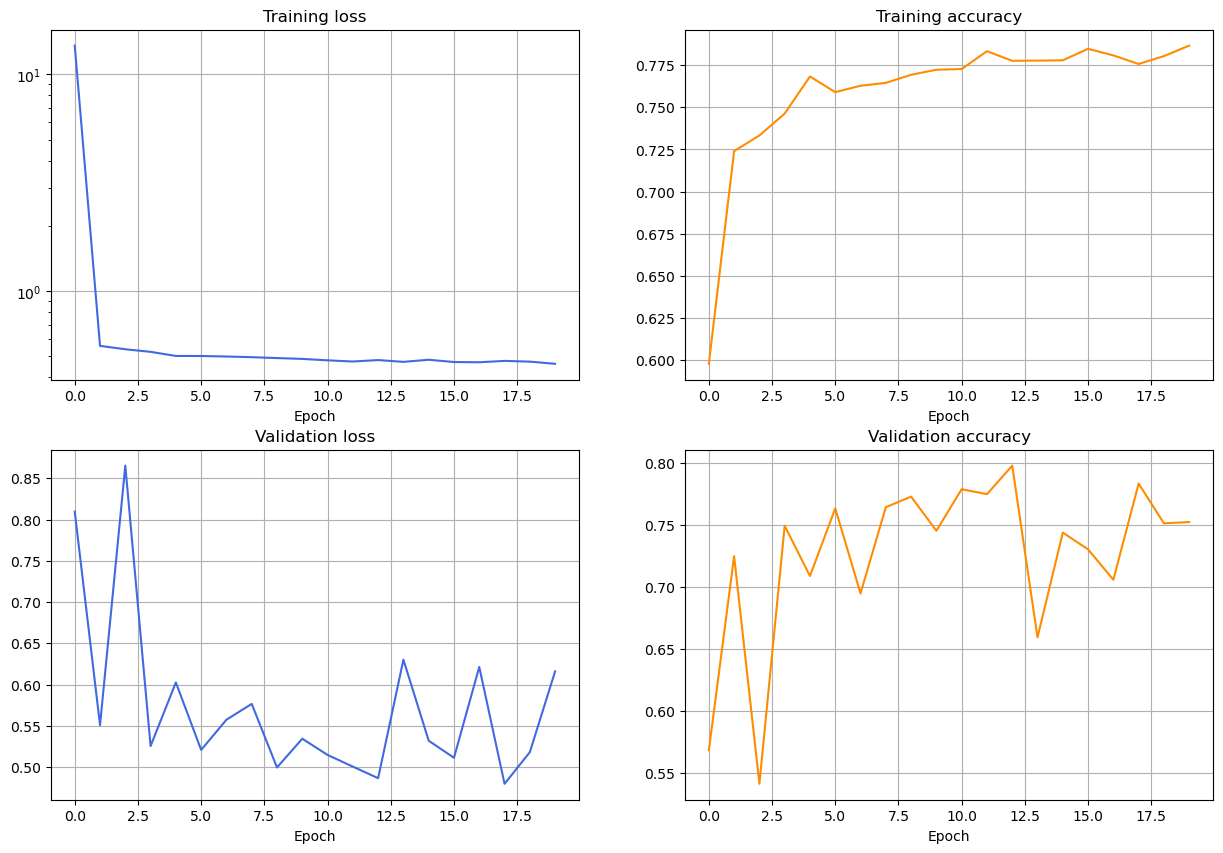

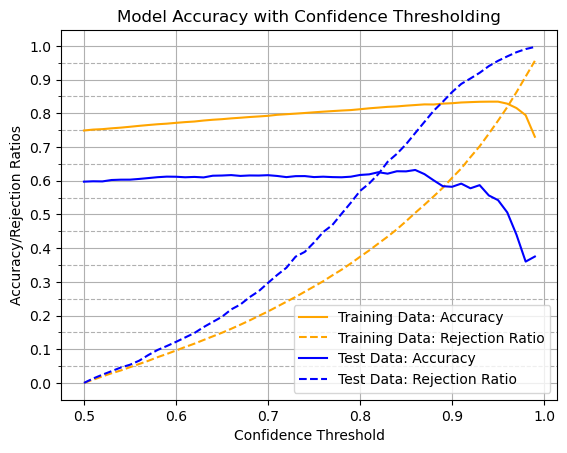

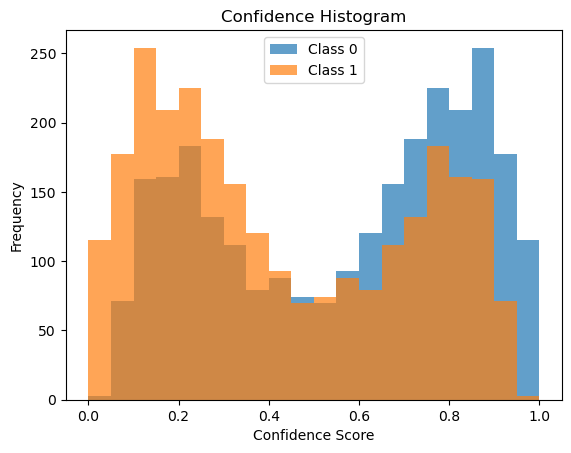

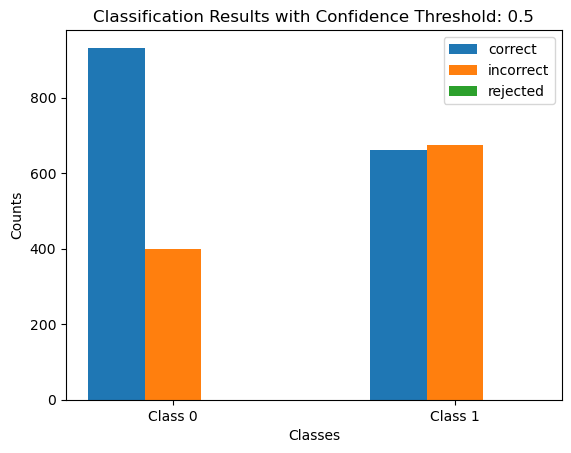

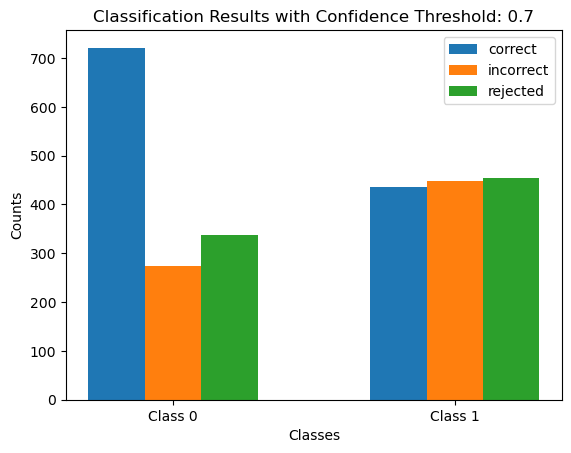

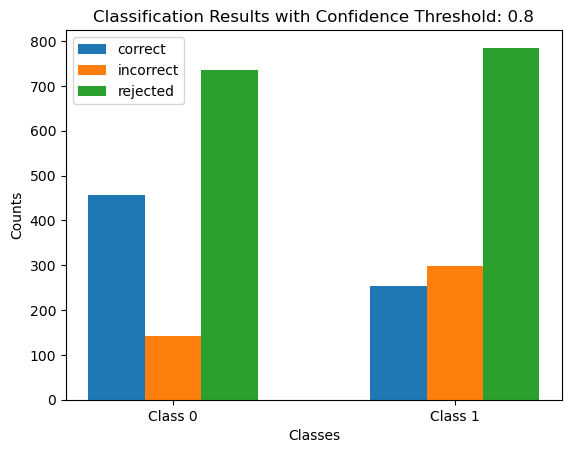

In [7]:
# plot training/validation loss and accuracy over training time
train_data = trainset
test_data = testset
model.plot_model_results()
model.plot_confidence_thresholding([['Training Data', train_data], ['Test Data', test_data]], thresholds=np.arange(0.5, 1, 0.01))
model.confidence_histogram(test_data)
model.plot_classification_results(test_data)
model.plot_classification_results(test_data, confidence_threshold=0.7)
model.plot_classification_results(test_data, confidence_threshold=0.8)


In [9]:
model_name = 'example_model'
model.save_model(ROOT + 'src/models/' + model_name + '.pt')